<a href="https://colab.research.google.com/github/tejpal123456789/Car-Brand-Prediction/blob/main/car_brand_using_transfer_learing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
# from tensorflow.appilcation.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot as plt



In [ ]:
# re-size all the images to this
image_size=[224,224]
train_path='/content/drive/My Drive/Images_data/Datasets/Train'
test_path='/content/drive/My Drive/Images_data/Datasets/Test'


In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of resNet
# Here we will be using imagenet weights

resnet=ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)



94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# do not train existing weights

for layer in resnet.layers:
    layer.trainable=False
    

In [ ]:
# useful for getting number of output classes  important (/*)
folders=glob('/content/drive/My Drive/Images_data/Datasets/Train/*')
folders
print(len(folders))

3


In [ ]:
# our layers - you can add more if you want

x=Flatten()(resnet.output)
prediction= Dense(len(folders),activation='softmax')(x)

# create a model
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compile
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])



In [ ]:
#Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 53s 43s/step - loss: 5.1871 - accuracy: 0.3125 - val_loss: 7.4732 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 733ms/step - loss: 5.1032 - accuracy: 0.4271 - val_loss: 5.0145 - val_accuracy: 0.5345
Epoch 3/50
2/2 [==============================] - 1s 712ms/step - loss: 7.0402 - accuracy: 0.3958 - val_loss: 6.0974 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 714ms/step - loss: 5.6817 - accuracy: 0.3646 - val_loss: 3.3944 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 1s 719ms/step - loss: 2.5527 - accuracy: 0.3542 - val_loss: 5.9282 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 730ms/step - loss: 4.4096 - accuracy: 0.3854 - val_loss: 2.0963 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 713ms/step - loss: 1.4314 - accuracy: 0.5104 - val_loss: 2.6746 - val_accuracy: 0.5690
Epoch 8/50
2/2 [=====

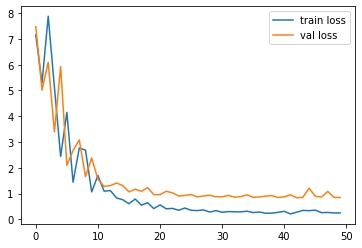

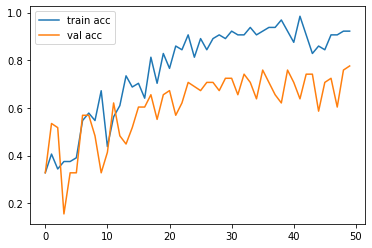

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save model it as a hs file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:
y_pred=model.predict(test_set)
y_pred

array([[5.26585169e-02, 2.82820389e-02, 9.19059515e-01],
       [1.63839713e-01, 3.76003295e-01, 4.60157007e-01],
       [4.69092932e-03, 9.56287801e-01, 3.90212685e-02],
       [3.84490564e-02, 8.83894145e-01, 7.76568428e-02],
       [4.76436540e-02, 9.33307409e-01, 1.90490205e-02],
       [3.42919342e-02, 2.89753731e-03, 9.62810516e-01],
       [7.54006281e-02, 1.94180440e-02, 9.05181348e-01],
       [2.31912315e-01, 7.36586869e-01, 3.15007679e-02],
       [6.88146660e-03, 9.80285943e-01, 1.28325261e-02],
       [6.31265761e-03, 9.61730838e-01, 3.19564305e-02],
       [6.52392924e-01, 2.74173200e-01, 7.34338537e-02],
       [5.83392717e-02, 5.99958062e-01, 3.41702610e-01],
       [9.21712592e-02, 7.28284121e-01, 1.79544613e-01],
       [1.93325728e-01, 5.42439461e-01, 2.64234841e-01],
       [2.85988338e-02, 3.06723843e-04, 9.71094429e-01],
       [6.67133331e-02, 2.32073277e-01, 7.01213360e-01],
       [9.43239545e-04, 9.72665846e-01, 2.63909120e-02],
       [1.90318245e-02, 9.51129

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1])